211805068
KAAN ERDEN

In [ ]:
import pandas as pd


file_path = 'wifi.csv'
# ---------------------

try:

    df = pd.read_csv(file_path)

    
    print("--- İlk 5 Satır ---")
    print(df.head())
    print("\n" + "="*50 + "\n")

    
    print(f"--- Veri Seti Boyutları (Satır, Sütun) ---")
    print(df.shape)
    print("\n" + "="*50 + "\n") 

    
    print("--- Sütun Bilgileri ve Veri Tipleri ---")
    df.info()
    print("\n" + "="*50 + "\n") 

    
    print("--- Sayısal Sütun İstatistikleri ---")
   
    print(df.describe())
    
    print("\n" + "="*50 + "\n") 

    
    print("--- Eksik Değer (NaN) Sayıları ---")
    print(df.isnull().sum())
    print("\n" + "="*50 + "\n") 

except FileNotFoundError:
    print(f"Hata: '{file_path}' adında bir dosya bulunamadı.")
    print("Lütfen dosya yolunu kontrol edip tekrar deneyin.")
except Exception as e:
    print(f"Veri yüklenirken bir hata oluştu: {e}")

--- İlk 5 Satır ---
   index  max_id (categoric)  min_id (categoric)  max_db  min_db  num_id  \
0      0                  13                  28     -82     -40      19   
1      1                  13                  28     -82     -40      19   
2      2                  13                  28     -82     -40      19   
3      3                  13                  28     -82     -40      19   
4      4                  12                  28     -82     -40      20   

        mean        std  max_ch (categoric)  min_ch (categoric)  ...  \
0 -69.157895  11.703635                   6                   1  ...   
1 -69.157895  11.703635                   6                   1  ...   
2 -69.157895  11.703635                   6                   1  ...   
3 -69.157895  11.703635                   6                   1  ...   
4 -71.100000   8.932525                   6                   1  ...   

   97_bssid  97_signal  98_bssid  98_signal  99_bssid (categoric)  99_signal  \
0         

Infos for the data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import re 
signal_columns = [col for col in df.columns if col.endswith('_signal')]
X = df[signal_columns].copy() 


target_columns = ['x', 'y', 'z']
y = df[target_columns].copy()


print("\n--- Özellik (X) Verisi ---")
print(f"Boyutlar: {X.shape}")
print(X.head())

print("\n--- Hedef (y) Verisi ---")
print(f"Boyutlar: {y.shape}")
print(y.head())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

print("\n--- Bölünmüş Veri Boyutları ---")
print("X_train boyutu:", X_train.shape)
print("X_test boyutu:", X_test.shape)
print("y_train boyutu:", y_train.shape)
print("y_test boyutu:", y_test.shape)
print("\n" + "="*50 + "\n")




--- Özellik (X) Verisi ---
Boyutlar: (1984, 100)
   0_signal  1_signal  2_signal  3_signal  4_signal  5_signal  6_signal  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4       -80         0         0         0         0         0         0   

   7_signal  8_signal  9_signal  ...  90_signal  91_signal  92_signal  \
0         0         0         0  ...          0          0          0   
1         0         0         0  ...          0          0          0   
2         0         0         0  ...          0          0          0   
3         0         0         0  ...          0          0          0   
4         0         0         0  ...          0          0          0   

   93_signal  94_signal  95_signal  96_signal  97_signal  98

In this code, we are preparing a dataset by selecting feature and target columns, and then splitting the data into training and test sets for machine learning purposes.

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import re

zero_replacement_value = -105
X_train = X_train.replace(0, zero_replacement_value)
X_test = X_test.replace(0, zero_replacement_value)
print(f"0 değerleri {zero_replacement_value} ile değiştirildi.")


threshold_percent = 90.0
limit = len(X_train) * (threshold_percent / 100.0)


counts = (X_train == zero_replacement_value).sum()


cols_to_drop = counts[counts >= limit].index.tolist()

if cols_to_drop:
    print(f"\n'{threshold_percent}%' veya daha fazla '{zero_replacement_value}' içeren {len(cols_to_drop)} sütun bulundu ve çıkarılacak:")
  
    X_train = X_train.drop(columns=cols_to_drop)
    X_test = X_test.drop(columns=cols_to_drop)
    print(f"Sütunlar çıkarıldı. Kalan özellik sayısı: {X_train.shape[1]}")
else:
    print(f"\n'{threshold_percent}%' veya daha fazla '{zero_replacement_value}' içeren sütun bulunamadı.")

print(f"X_train güncel boyutu: {X_train.shape}")
print(f"X_test güncel boyutu: {X_test.shape}")


scaler = StandardScaler()


scaler.fit(X_train)


X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


remaining_columns = X_train.columns 
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=remaining_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=remaining_columns)

print("\n--- Ölçeklendirme Sonrası Veri (İlk 5 Satır) ---")
print("X_train_scaled:")
print(X_train_scaled.head())
print("\nX_test_scaled:")
print(X_test_scaled.head())

print("\n--- Ön İşleme Tamamlandı ---")
print(f"Eğitim için hazır özellik sayısı: {X_train_scaled.shape[1]}")
print(f"Eğitim örnek sayısı: {X_train_scaled.shape[0]}")
print(f"Test örnek sayısı: {X_test_scaled.shape[0]}")

0 değerleri -105 ile değiştirildi.

'90.0%' veya daha fazla '-105' içeren sütun bulunamadı.
X_train güncel boyutu: (1388, 40)
X_test güncel boyutu: (596, 40)

--- Ölçeklendirme Sonrası Veri (İlk 5 Satır) ---
X_train_scaled:
      24_signal  29_signal  31_signal  34_signal  35_signal  36_signal  \
1713   0.534031  -0.504157   0.068422   0.787637   0.784780   0.016250   
1911   0.815361  -0.504157   0.301048   0.787637   0.629757  -1.063209   
1856   2.081347  -0.504157  -1.152866  -0.846853  -0.842970  -1.063209   
507    0.112035  -0.504157   1.115240   2.188629   2.179995   2.516051   
1010  -1.364948  -0.504157   0.766300   1.098969   1.094828   1.152523   

      37_signal  38_signal  39_signal  40_signal  ...  75_signal  76_signal  \
1713   0.268960  -0.649505  -0.689478  -0.719939  ...  -0.743469   0.713581   
1911  -1.049167  -0.649505   0.731156  -0.719939  ...  -0.743469   0.102795   
1856  -1.049167   1.747246   1.640361  -0.719939  ...  -0.743469  -1.179856   
507    2.446735

In this part of the project, we clean and prepare our feature data (X_train, X_test) before training a machine learning model.

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler     






def mean_euclidean_distance(y_true, y_pred):
  
   
    if isinstance(y_true, pd.DataFrame):
        y_true = y_true.values
    
    if isinstance(y_pred, pd.DataFrame):
        y_pred = y_pred.values

    
    distances = np.sqrt(np.sum((y_true - y_pred)**2, axis=1))
    
    mean_distance = np.mean(distances)
    return mean_distance


rf_model = RandomForestRegressor(n_estimators=100, random_state=13, n_jobs=-1, max_depth = 15, min_samples_split=5 )



rf_model.fit(X_train_scaled, y_train)




y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)



med_train_rf = mean_euclidean_distance(y_train, y_train_pred_rf)
med_test_rf = mean_euclidean_distance(y_test, y_test_pred_rf)

print("\n--- Random Forest Performansı (Tüm Kalan Özelliklerle) ---")
print(f"Kullanılan Özellik Sayısı: {X_train_scaled.shape[1]}")
print(f"Eğitim Seti Ortalama Öklid Mesafesi (MED): {med_train_rf:.4f} metre")
print(f"Test Seti Ortalama Öklid Mesafesi (MED): {med_test_rf:.4f} metre")
print("="*50 + "\n")


feature_importances = rf_model.feature_importances_

importances_series = pd.Series(feature_importances, index=X_train_scaled.columns)


print("--- En Önemli 20 Özellik (Random Forest'a Göre) ---")
print(importances_series.sort_values(ascending=False).head(20))
print("="*50 + "\n")


--- Random Forest Performansı (Tüm Kalan Özelliklerle) ---
Kullanılan Özellik Sayısı: 40
Eğitim Seti Ortalama Öklid Mesafesi (MED): 0.3584 metre
Test Seti Ortalama Öklid Mesafesi (MED): 0.6866 metre

--- En Önemli 20 Özellik (Random Forest'a Göre) ---
68_signal    0.231264
78_signal    0.183778
69_signal    0.137633
36_signal    0.087216
97_signal    0.059946
29_signal    0.043722
31_signal    0.033019
42_signal    0.023370
50_signal    0.021105
41_signal    0.015762
79_signal    0.015435
80_signal    0.013011
52_signal    0.012750
38_signal    0.011275
46_signal    0.010063
73_signal    0.007770
47_signal    0.007692
96_signal    0.007614
39_signal    0.007082
81_signal    0.007037
dtype: float64



we train a Random Forest Regressor to predict target values (x, y, z) and evaluate how well it performs using Mean Euclidean Distance. We also look at which features were most important for the model.


--- Tahmin Edilen vs Gerçek 3B Koordinat Grafiği Oluşturuluyor ---


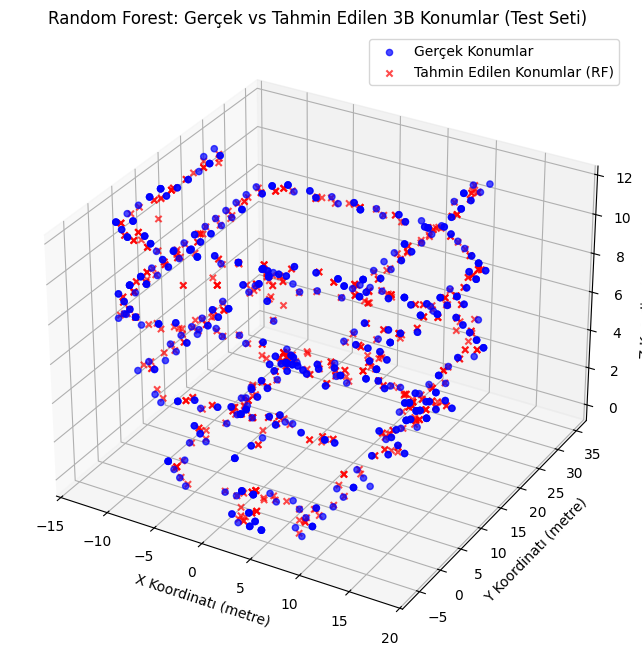


--- Özellik Önemliliği Grafiği Oluşturuluyor ---


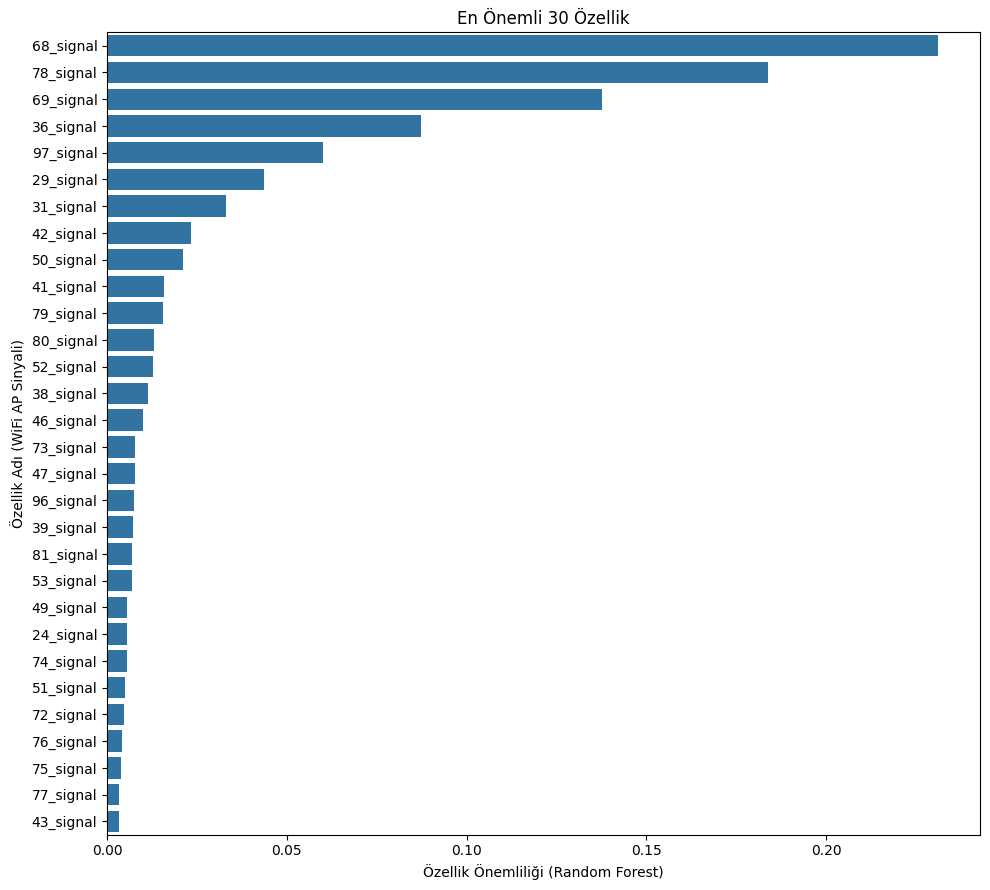

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import seaborn as sns 






if isinstance(y_test, pd.DataFrame):
    y_test_np = y_test.values
else:
    y_test_np = y_test


if isinstance(y_test_pred_rf, pd.DataFrame):
    y_test_pred_rf_np = y_test_pred_rf.values
else:
    y_test_pred_rf_np = y_test_pred_rf

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(y_test_np[:, 0], y_test_np[:, 1], y_test_np[:, 2],
           c='blue', marker='o', label='Gerçek Konumlar', alpha=0.7)


ax.scatter(y_test_pred_rf_np[:, 0], y_test_pred_rf_np[:, 1], y_test_pred_rf_np[:, 2],
           c='red', marker='x', label='Tahmin Edilen Konumlar (RF)', alpha=0.7)



ax.set_xlabel('X Koordinatı (metre)')
ax.set_ylabel('Y Koordinatı (metre)')
ax.set_zlabel('Z Koordinatı (metre)')
ax.set_title('Random Forest: Gerçek vs Tahmin Edilen 3B Konumlar (Test Seti)')
ax.legend()
ax.grid(True)
plt.show() 






n_top_features = 30 
n_top_features = min(n_top_features, X_train_scaled.shape[1]) 


sorted_importances = importances_series.sort_values(ascending=False)
top_importances = sorted_importances.head(n_top_features)

plt.figure(figsize=(10, n_top_features * 0.3)) 
sns.barplot(x=top_importances.values, y=top_importances.index) 
plt.xlabel('Özellik Önemliliği (Random Forest)')
plt.ylabel('Özellik Adı (WiFi AP Sinyali)')
plt.title(f'En Önemli {n_top_features} Özellik')
plt.tight_layout() 
plt.show()

This part of the code is all about visualizing:

How well our Random Forest model predicted 3D positions.

Which features (input signals) were most important for the model

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler     





if 'remaining_columns' not in locals() or remaining_columns is None:
    remaining_columns = X_train_scaled.columns 


print("\n" + "="*20 + " XGBoost Modeli " + "="*20 + "\n")


xgb_model = xgb.XGBRegressor(objective='reg:squarederror', 
                             n_estimators=100,
                             learning_rate=0.1,
                             max_depth=7,         
                             subsample=0.8,        
                             colsample_bytree=0.8, 
                             random_state=13,
                             n_jobs=-1)


xgb_model.fit(X_train_scaled, y_train)


y_train_pred_xgb = xgb_model.predict(X_train_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)


med_train_xgb_base = mean_euclidean_distance(y_train, y_train_pred_xgb)
med_test_xgb_base = mean_euclidean_distance(y_test, y_test_pred_xgb)

print("\n--- XGBoost Performansı (Tüm Kalan Özelliklerle) ---")
print(f"Kullanılan Özellik Sayısı: {X_train_scaled.shape[1]}")
print(f"Eğitim Seti MED: {med_train_xgb_base:.4f} metre")
print(f"Test Seti MED: {med_test_xgb_base:.4f} metre")


feature_importances_xgb = xgb_model.feature_importances_
importances_series_xgb = pd.Series(feature_importances_xgb, index=remaining_columns)
sorted_importances_xgb = importances_series_xgb.sort_values(ascending=False)

print("\n--- En Önemli 20 Özellik (XGBoost'a Göre) ---")
print(sorted_importances_xgb.head(20))
print("="*50 + "\n")


print("--- XGBoost ile Özellik Seçimi Süreci ---")
results_xgb = {}
initial_feature_count_xgb = X_train_scaled.shape[1]
n_features_to_try_xgb = [initial_feature_count_xgb] + [k for k in [80, 70, 60, 50, 40, 35, 30, 25, 20, 15, 10] if k < initial_feature_count_xgb]
n_features_to_try_xgb.sort(reverse=True)

for k in n_features_to_try_xgb:
    print(f"\n--- XGBoost: En İyi {k} Özellik ile Deneme ---")
    top_k_features_xgb = sorted_importances_xgb.head(k).index.tolist()

    X_train_subset_xgb = X_train_scaled[top_k_features_xgb]
    X_test_subset_xgb = X_test_scaled[top_k_features_xgb]

    xgb_model_subset = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1,
                                        max_depth=7, subsample=0.8, colsample_bytree=0.8,
                                        random_state=13, n_jobs=-1)
    xgb_model_subset.fit(X_train_subset_xgb, y_train)
    y_test_pred_subset_xgb = xgb_model_subset.predict(X_test_subset_xgb)
    med_test_subset_xgb = mean_euclidean_distance(y_test, y_test_pred_subset_xgb)
    print(f"XGBoost - En İyi {k} Özellik ile Test MED: {med_test_subset_xgb:.4f} metre")
    results_xgb[k] = med_test_subset_xgb

print("\n" + "="*50 + "\n")
print("--- XGBoost Özellik Seçimi Sonuçları ---")
best_k_xgb = min(results_xgb, key=results_xgb.get)
best_med_xgb = results_xgb[best_k_xgb]
for k, med in sorted(results_xgb.items(), key=lambda item: item[0], reverse=True):
    print(f"Özellik Sayısı: {k:<4} | Test MED: {med:.4f} metre {'*** En İyi (XGB) ***' if k == best_k_xgb else ''}")
print(f"\nXGBoost için en düşük Test MED ({best_med_xgb:.4f} metre), {best_k_xgb} özellik kullanılarak elde edildi.")
print("="*50 + "\n")

print(f"XGBoost: En iyi {best_k_xgb} özellik ile Test MED = {best_med_xgb:.4f} metre")



==================== XGBoost Modeli ====================

--- XGBoost Modeli Eğitiliyor (Tüm Kalan Özelliklerle) ---
Model eğitimi tamamlandı.

--- XGBoost Performansı (Tüm Kalan Özelliklerle) ---
Kullanılan Özellik Sayısı: 40
Eğitim Seti MED: 0.1478 metre
Test Seti MED: 0.3644 metre

--- En Önemli 20 Özellik (XGBoost'a Göre) ---
41_signal    0.213499
35_signal    0.151370
74_signal    0.150392
81_signal    0.090610
80_signal    0.058624
34_signal    0.053065
39_signal    0.042397
69_signal    0.024849
72_signal    0.020219
38_signal    0.018480
78_signal    0.014419
53_signal    0.014187
96_signal    0.011767
31_signal    0.011362
68_signal    0.009991
97_signal    0.009544
52_signal    0.009318
51_signal    0.008266
70_signal    0.007428
73_signal    0.007176
dtype: float32

--- XGBoost ile Özellik Seçimi Süreci ---

--- XGBoost: En İyi 40 Özellik ile Deneme ---
XGBoost - En İyi 40 Özellik ile Test MED: 0.3576 metre

--- XGBoost: En İyi 35 Özellik ile Deneme ---
XGBoost - En İyi 35 

we use XGBoost, a powerful and efficient machine learning algorithm, to predict 3D coordinates. Then, we analyze feature importance and experiment with selecting only the top K features to improve performance.

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error 
print("\n" + "="*20 + " Nihai Model: XGBoost " + "="*20 + "\n")
best_k_final = 40 
try:
    final_features = sorted_importances_xgb.head(best_k_final).index.tolist()
    print(f"Nihai model için en iyi {best_k_final} özellik seçildi.")

except NameError:
    print("Hata: 'sorted_importances_xgb' bulunamadı. Lütfen önceki XGBoost kodunun çalıştığından emin olun.")
    exit()
X_train_final = X_train_scaled[final_features]
X_test_final = X_test_scaled[final_features]
print(f"Nihai Eğitim Seti Boyutu: {X_train_final.shape}")
print(f"Nihai Test Seti Boyutu: {X_test_final.shape}")
final_xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                                   n_estimators=100,
                                   learning_rate=0.1,
                                   max_depth=7,
                                   subsample=0.8,
                                   colsample_bytree=0.8,
                                   random_state=13,
                                   n_jobs=-1)

print("\n--- Nihai XGBoost Modeli Eğitiliyor ---")
final_xgb_model.fit(X_train_final, y_train)
print("Nihai model eğitimi tamamlandı.")
print("\n--- Nihai Model Değerlendirmesi ---")
y_train_pred_final = final_xgb_model.predict(X_train_final)
y_test_pred_final = final_xgb_model.predict(X_test_final)
med_train_final = mean_euclidean_distance(y_train, y_train_pred_final)
med_test_final = mean_euclidean_distance(y_test, y_test_pred_final) # Bu, daha önceki best_med_xgb ile aynı olmalı
print("\n--- ÖDEV SONUÇ RAPORU ---")
print(f"Seçilen Model: XGBoost Regressor")
print(f"Kullanılan Özellik Sayısı: {best_k_final}")
print("-" * 30)
print(f"Eğitim Seti Ortalama Öklid Mesafesi (MED): {med_train_final:.4f} metre")
print(f"Test Seti Ortalama Öklid Mesafesi (MED):  {med_test_final:.4f} metre")
print("=" * 50)



==================== Nihai Model: XGBoost ====================

Nihai model için en iyi 40 özellik seçildi.
Nihai Eğitim Seti Boyutu: (1388, 40)
Nihai Test Seti Boyutu: (596, 40)

--- Nihai XGBoost Modeli Eğitiliyor ---
Nihai model eğitimi tamamlandı.

--- Nihai Model Değerlendirmesi ---

--- ÖDEV SONUÇ RAPORU ---
Seçilen Model: XGBoost Regressor
Kullanılan Özellik Sayısı: 40
------------------------------
Eğitim Seti Ortalama Öklid Mesafesi (MED): 0.1562 metre
Test Seti Ortalama Öklid Mesafesi (MED):  0.3576 metre


We use 40 feature for XGB and shows aur euclidean distacne for train and test set


--- Nihai XGBoost: Tahmin Edilen vs Gerçek 3B Koordinat Grafiği Oluşturuluyor ---


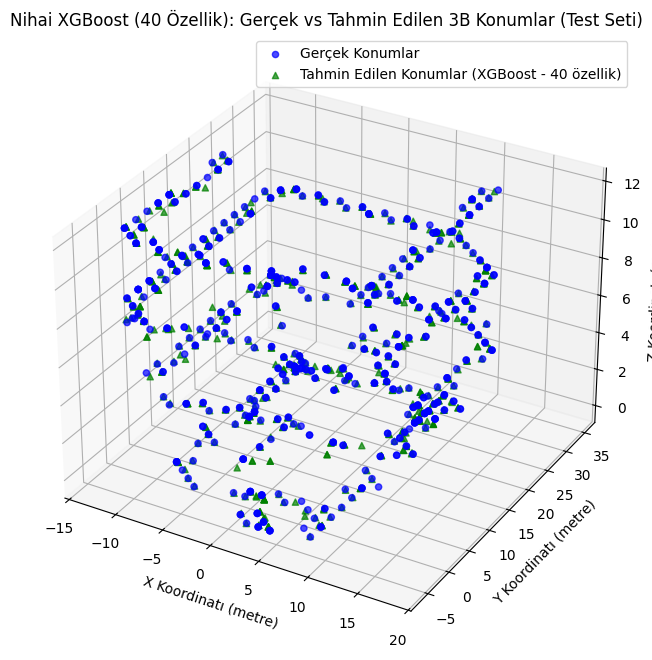


--- Nihai XGBoost: Özellik Önemliliği Grafiği Oluşturuluyor ---


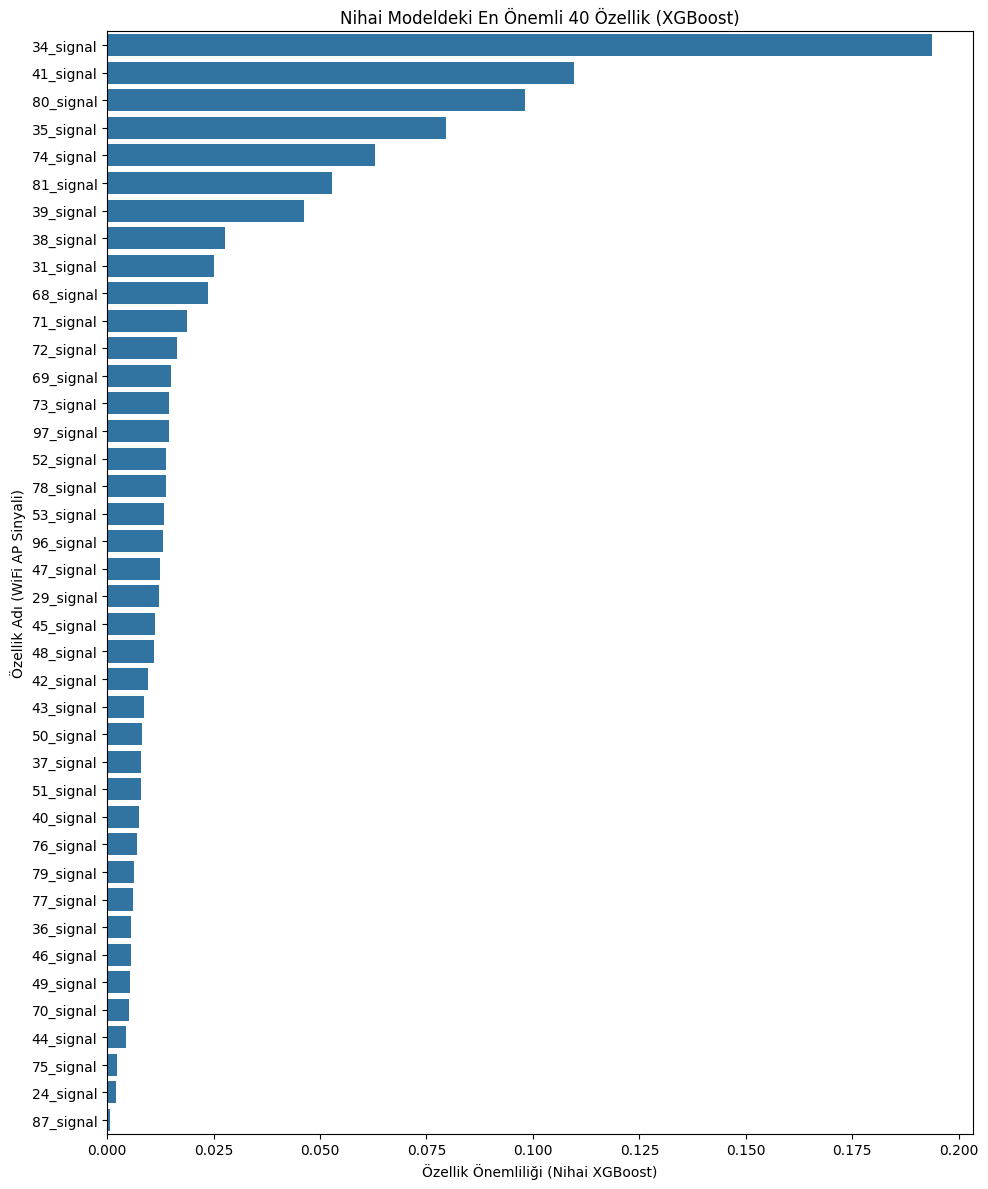

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import seaborn as sns 
import pandas as pd





if isinstance(y_test, pd.DataFrame):
    y_test_np = y_test.values
else:
    y_test_np = y_test

if isinstance(y_test_pred_final, pd.DataFrame):
    y_test_pred_final_np = y_test_pred_final.values
else:
    y_test_pred_final_np = y_test_pred_final

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(y_test_np[:, 0], y_test_np[:, 1], y_test_np[:, 2],
           c='blue', marker='o', label='Gerçek Konumlar', alpha=0.7)


ax.scatter(y_test_pred_final_np[:, 0], y_test_pred_final_np[:, 1], y_test_pred_final_np[:, 2],
           c='green', marker='^', label=f'Tahmin Edilen Konumlar (XGBoost - {best_k_final} özellik)', alpha=0.7)

ax.set_xlabel('X Koordinatı (metre)')
ax.set_ylabel('Y Koordinatı (metre)')
ax.set_zlabel('Z Koordinatı (metre)')
ax.set_title(f'Nihai XGBoost ({best_k_final} Özellik): Gerçek vs Tahmin Edilen 3B Konumlar (Test Seti)')
ax.legend()
ax.grid(True)
plt.show()




print("\n--- Nihai XGBoost: Özellik Önemliliği Grafiği Oluşturuluyor ---")


final_importances = final_xgb_model.feature_importances_
final_importances_series = pd.Series(final_importances, index=final_features)


sorted_final_importances = final_importances_series.sort_values(ascending=False)


plt.figure(figsize=(10, 12))
sns.barplot(x=sorted_final_importances.values, y=sorted_final_importances.index)
plt.xlabel('Özellik Önemliliği (Nihai XGBoost)')
plt.ylabel('Özellik Adı (WiFi AP Sinyali)')
plt.title(f'Nihai Modeldeki En Önemli {best_k_final} Özellik (XGBoost)')
plt.tight_layout() 
plt.show()

Vısualization for XGB